# **Unsupervised Learning - Wine Dataset**

### Importing necessary libraries

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [320]:
data = load_wine()

In [321]:
data = pd.DataFrame(data.data,columns=data.feature_names)

In [322]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Exploration

In [323]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [325]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


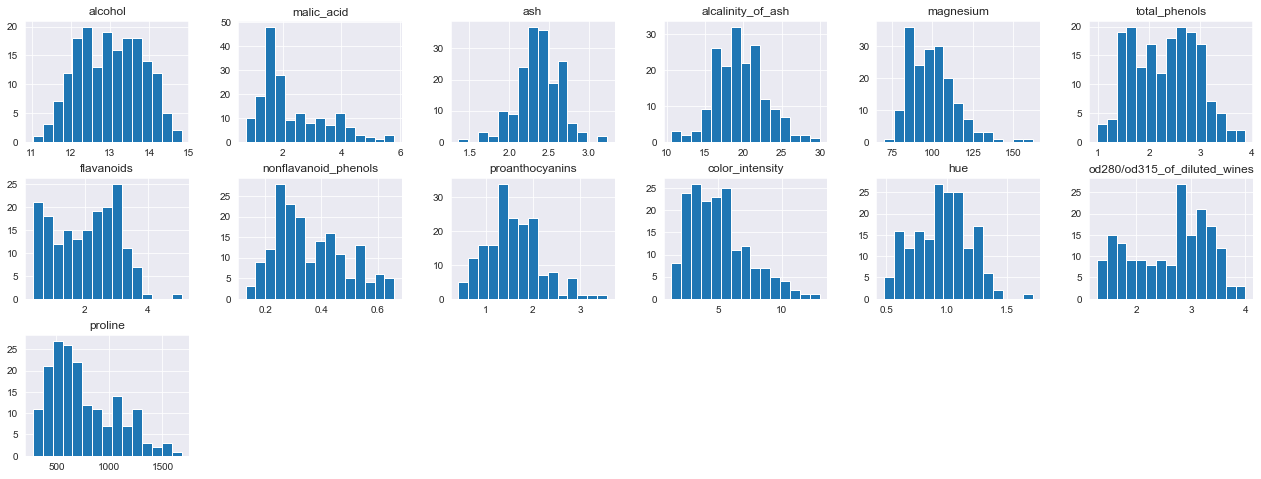

In [326]:
data[data.columns].hist(bins=15, figsize=(22, 8), layout=(3,6));

Text(0.5, 1.0, 'Correlation Heatmap')

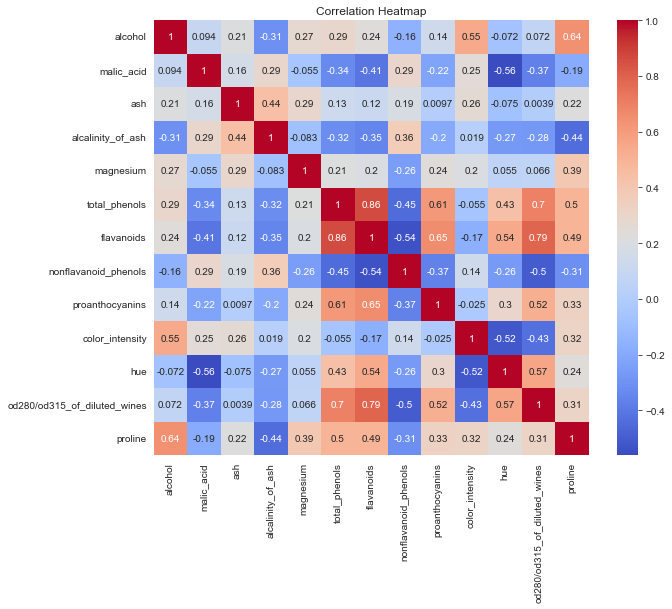

In [327]:
correlation_matrix = data[data.columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')

## Standardization the feature matrix

In [328]:
X = StandardScaler().fit_transform(X)

X
# We standardize the feature matrix 'X' to normalize the data within a particular range.
# This also helps in speeding up the calculations in an algorithm.

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

# Dimensionality Reduction with PCA

In [329]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
# PCA is a technique used to emphasize variation and bring out strong patterns in a dataset.
# We use it here to reduce the dimensionality of the data.

In [330]:
df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
# We create a new DataFrame that will have the principal component values for all the samples.

In [331]:
df.head

<bound method NDFrame.head of      principal component 1  principal component 2  principal component 3
0                 2.551769               0.301013              -2.033484
1                 2.803540              -1.064472               0.977806
2                 3.927293              -2.809760              -0.177293
3                 1.422861              -0.887657               2.021808
4                 3.293710              -2.172936              -0.637680
..                     ...                    ...                    ...
172              -3.624646              -2.181813              -0.343779
173              -2.938786              -1.737918               0.212168
174              -3.034697              -2.738003              -0.922746
175              -2.760688              -2.278545              -0.536924
176              -3.497047              -2.737453               1.010632

[177 rows x 3 columns]>

# Step 6: Apply K-Means

In [332]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
# K-means is a type of partitioning clustering, that is, it divides the data into k non-overlapping subsets (or clusters)
# without any cluster-internal structure or labels. This means, it's an unsupervised algorithm.


c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

# Step 7: Add the labels to the dataframe

In [333]:
df['labels'] = kmeans.labels_
# We add the K-means clustering labels to our DataFrame.

In [334]:
df.tail()

,principal component 1,principal component 2,principal component 3,labels
172,-3.624646,-2.181813,-0.343779,2
173,-2.938786,-1.737918,0.212168,2
174,-3.034697,-2.738003,-0.922746,2
175,-2.760688,-2.278545,-0.536924,2
176,-3.497047,-2.737453,1.010632,2


# Suggestions

# Workspace

###  Suggestions

Text(0.5, 1.0, 'Correlation Heatmap')

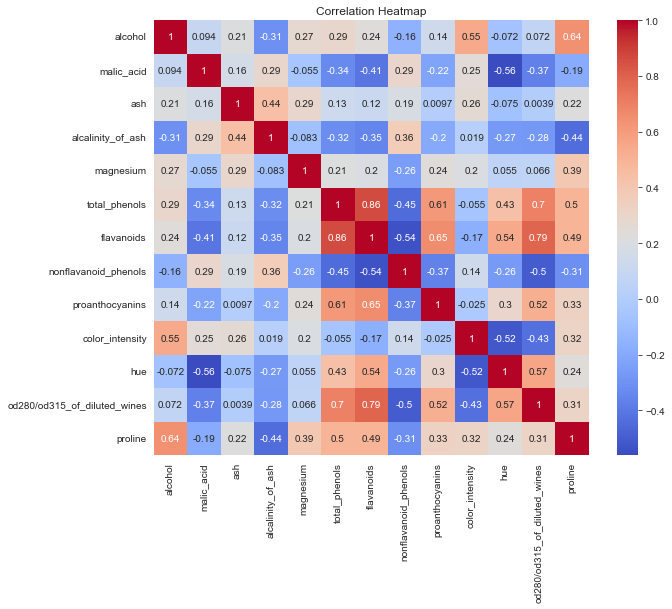

In [356]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='flavanoids', ylabel='total_phenols'>

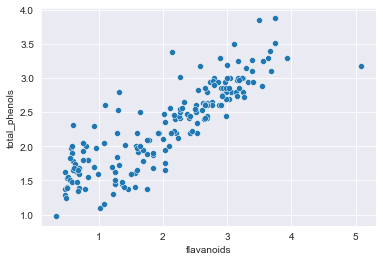

In [351]:
sns.scatterplot(data['flavanoids'],data['total_phenols'])

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='malic_acid', ylabel='hue'>

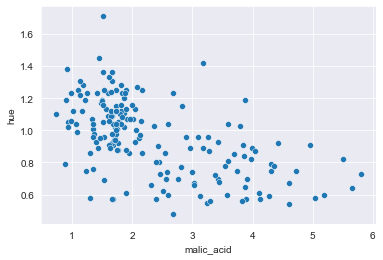

In [352]:
sns.scatterplot(data['malic_acid'],data['hue'])

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='flavanoids', ylabel='od280/od315_of_diluted_wines'>

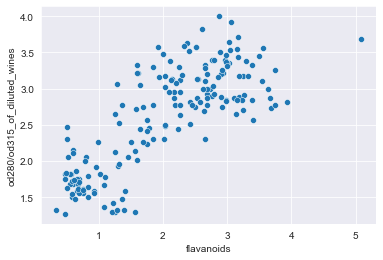

In [353]:
sns.scatterplot(data['flavanoids'],data['od280/od315_of_diluted_wines'])

# Other Experiments

**experimeting with 3 components**

In [336]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

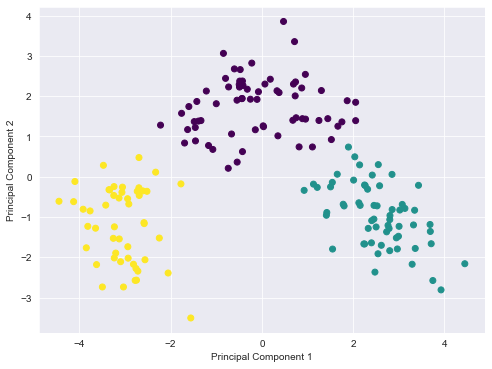

In [337]:
plt.figure(figsize=(8,6))
plt.scatter(df['principal component 1'], df['principal component 2'], c=kmeans.labels_,cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# We create a scatter plot of the two principal components and color it according to the K-Means cluster assignments.


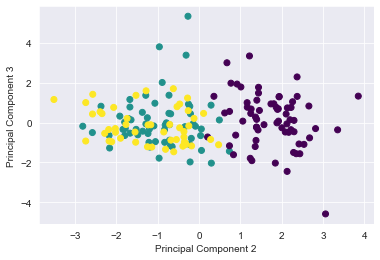

In [338]:
plt.scatter(df['principal component 2'], df['principal component 3'], c=kmeans.labels_,cmap='viridis')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.show()

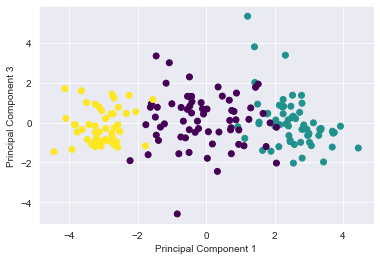

In [339]:
plt.scatter(df['principal component 1'], df['principal component 3'], c=kmeans.labels_,cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.show()

# 3D Visualization of clusters

Text(0.5, 0, 'Principal Component 3')

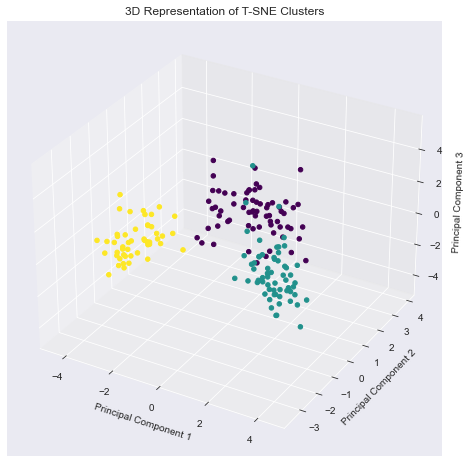

In [340]:
plt.figure(figsize = (10, 8))
plot_axes = plt.axes(projection = '3d')
plt.title('3D Representation of T-SNE Clusters')
plot_axes.scatter3D(df['principal component 1'],df['principal component 2'], df['principal component 3'],c=kmeans.labels_,depthshade=False,cmap='viridis')
plot_axes.set_xlabel('Principal Component 1')
plot_axes.set_ylabel('Principal Component 2')
plot_axes.set_zlabel('Principal Component 3')

## Determining optimal number of clusters using the elbow method

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

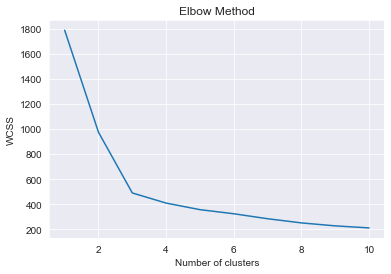

In [341]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Here we're using the elbow method to determine the optimal number of clusters.
# We run a loop to fit multiple k-means models and in each successive model,
# we increase the number of clusters. We record the sum of squared distances (WCSS) and plot it to observe 'The elbow'.

## Inertia decreases from 3 to 4 very slowly , so 3 was a good choice

# Real-world Application

## Cyberprofiling

### Kmeans

**In this era of billions of users in the internet having different different interests, It's very hard to find the difference between a cyber criminal & a general user. But it is possible to analyze the human behavior & find out all the patterns. Next they try to continuously analyze the internet activities of suspected users & using lot of different algorithms they classify those activities. One of the method in this prospect is “K-Means clustering”.**

**Let's say after applying K-Means algorithm on the internet traffic of the suspected users we find out this below graph :**

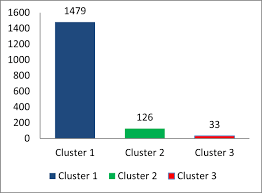

* Cluster 1 means these users has a normal web activities. But cluster 2 has little bit suspicious web activities. Whereas those users who belong to cluster 3 has very suspicious web activities.